### MINI PROJECT                                                            
#### COMPUTER VISION THEORY                                             
#### NAME: HARSH SAOJI                                 
#### BRANCH: DATA SCIENCE                                         
#### SECTION: A                                      
#### ROLL No.: 38

In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
#  Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Display images inline
%matplotlib inline

In [6]:
# Replace these with your actual image paths
img1 = cv2.imread('image_1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image_2.jpg', cv2.IMREAD_GRAYSCALE)

img1 = cv2.resize(img1, (400, 400))
img2 = cv2.resize(img2, (400, 400))

#### 1. SIFT feature detection and matching

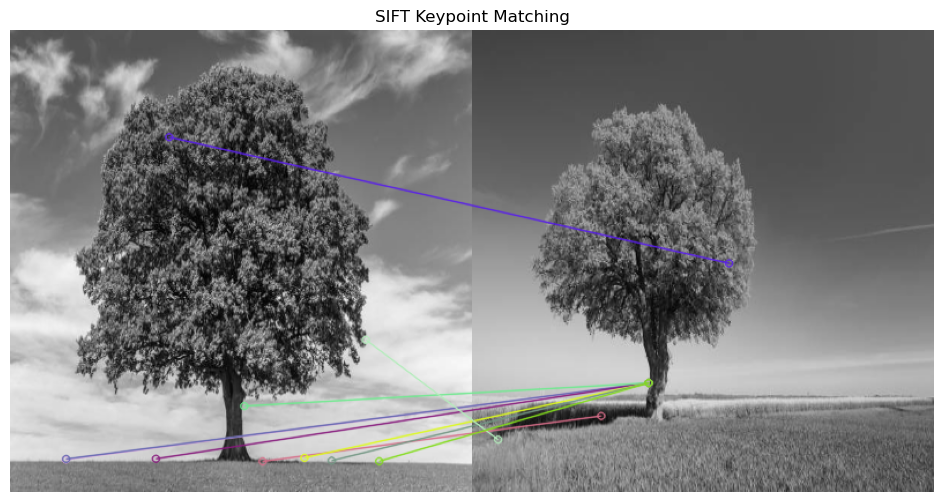

In [9]:
sift = cv2.SIFT_create()
kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2, None)

bf_sift = cv2.BFMatcher()
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

# Lowe's ratio test
good_sift = []
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_sift.append([m])

img_sift = cv2.drawMatchesKnn(img1, kp1_sift, img2, kp2_sift, good_sift, None, flags=2)

plt.figure(figsize=(12, 6))
plt.imshow(img_sift)
plt.title('SIFT Keypoint Matching')
plt.axis('off')
plt.show()

#### 2. SURF feature detection and matching

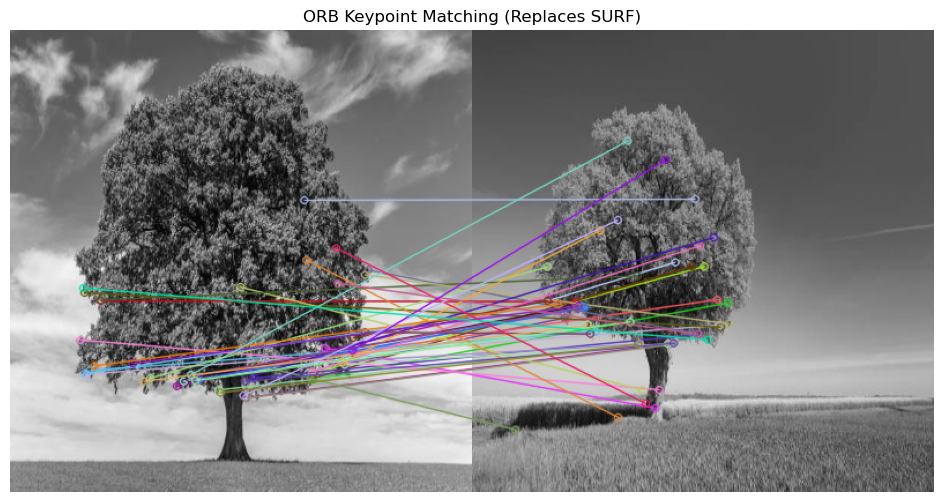

In [12]:
# --- ORB Feature Detection & Matching (Alternative to SURF) ---
orb = cv2.ORB_create(nfeatures=1000)

kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)

bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(des1_orb, des2_orb)

# Sort by distance
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

img_orb = cv2.drawMatches(img1, kp1_orb, img2, kp2_orb, matches_orb[:50], None, flags=2)

plt.figure(figsize=(12, 6))
plt.imshow(img_orb)
plt.title('ORB Keypoint Matching (Replaces SURF)')
plt.axis('off')
plt.show()

#### 3. RANSAC: Remove outliners from SIFT Matches 

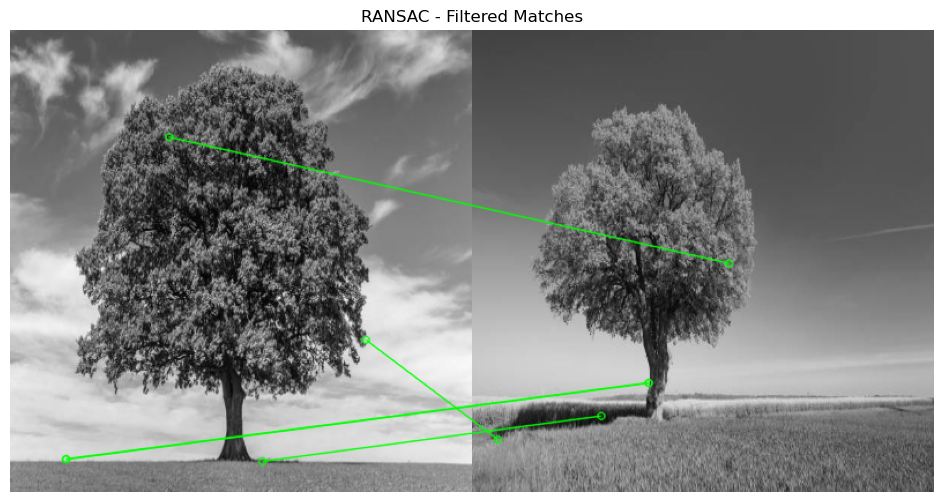

In [15]:
src_pts = np.float32([kp1_sift[m[0].queryIdx].pt for m in good_sift]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2_sift[m[0].trainIdx].pt for m in good_sift]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = [[m] for m in mask.ravel().tolist()]  # ✅ Correct structure

img_ransac = cv2.drawMatchesKnn(img1, kp1_sift, img2, kp2_sift, good_sift, None,
                                 matchColor=(0, 255, 0), matchesMask=matchesMask, flags=2)

plt.figure(figsize=(12, 6))
plt.imshow(img_ransac)
plt.title('RANSAC - Filtered Matches')
plt.axis('off')
plt.show()

#### 4.Harris corner detection

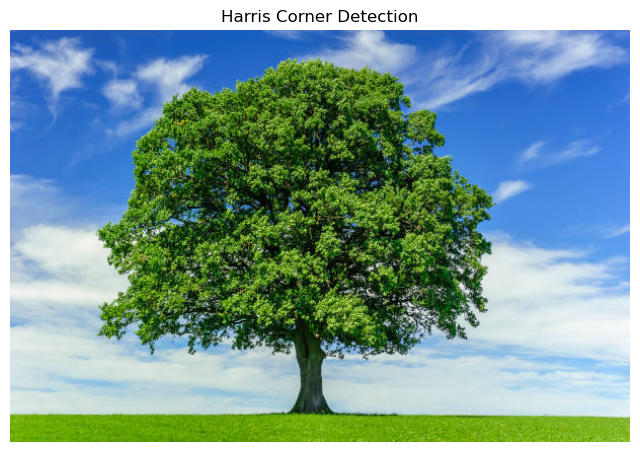

In [66]:
harris_img1 = cv2.imread('image_1.jpg')  # reload color version
gray_harris = cv2.cvtColor(harris_img, cv2.COLOR_BGR2GRAY)
gray_harris = np.float32(gray_harris)

harris_corners = cv2.cornerHarris(gray_harris, 2, 3, 0.04)
harris_img[harris_corners > 0.01 * harris_corners.max()] = [0,255,0]

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(harris_img1, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

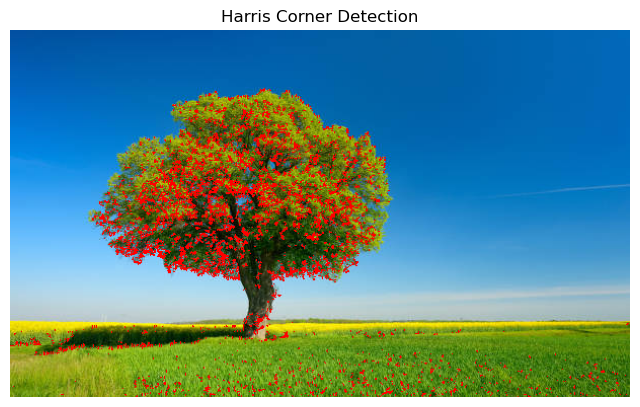

In [44]:
harris_img = cv2.imread('image_2.jpg')  # reload color version
gray_harris = cv2.cvtColor(harris_img, cv2.COLOR_BGR2GRAY)
gray_harris = np.float32(gray_harris)

harris_corners = cv2.cornerHarris(gray_harris, 2, 3, 0.04)
harris_img[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

#### 5. Shi-Tomasi Corner Detection

/var/folders/rw/lxqcyqb11y95l5tb67kgz2cr0000gn/T/ipykernel_3199/2378940280.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_shi = np.int0(corners_shi)


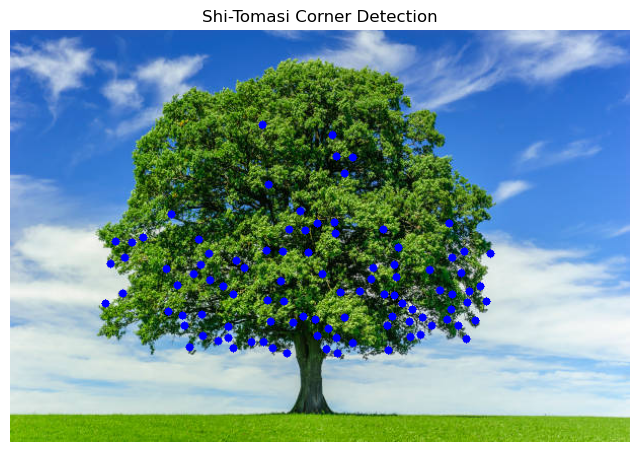

In [68]:
shi_img = cv2.imread('image_1.jpg')  # reload clean color image
gray_shi = cv2.cvtColor(shi_img, cv2.COLOR_BGR2GRAY)
corners_shi = cv2.goodFeaturesToTrack(gray_shi, 100, 0.01, 10)
corners_shi = np.int0(corners_shi)

for i in corners_shi:
    x, y = i.ravel()
    cv2.circle(shi_img, (x, y), 4, (255,0, 0), -1)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(shi_img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

/var/folders/rw/lxqcyqb11y95l5tb67kgz2cr0000gn/T/ipykernel_3199/2530376993.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_shi = np.int0(corners_shi)


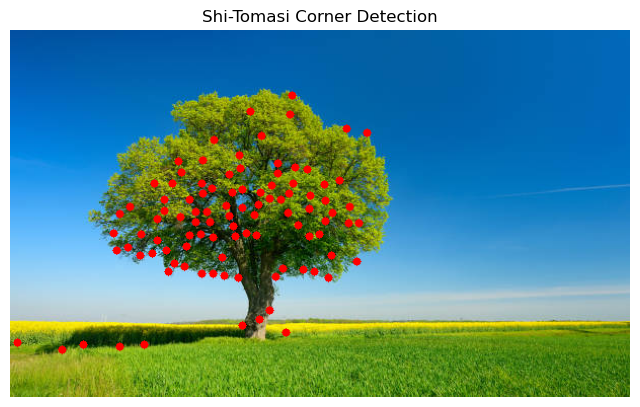

In [70]:
shi_img = cv2.imread('image_2.jpg')  # reload clean color image
gray_shi = cv2.cvtColor(shi_img, cv2.COLOR_BGR2GRAY)
corners_shi = cv2.goodFeaturesToTrack(gray_shi, 100, 0.01, 10)
corners_shi = np.int0(corners_shi)

for i in corners_shi:
    x, y = i.ravel()
    cv2.circle(shi_img, (x, y), 4, (0,0,255), -1)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(shi_img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

#### Display all results together 

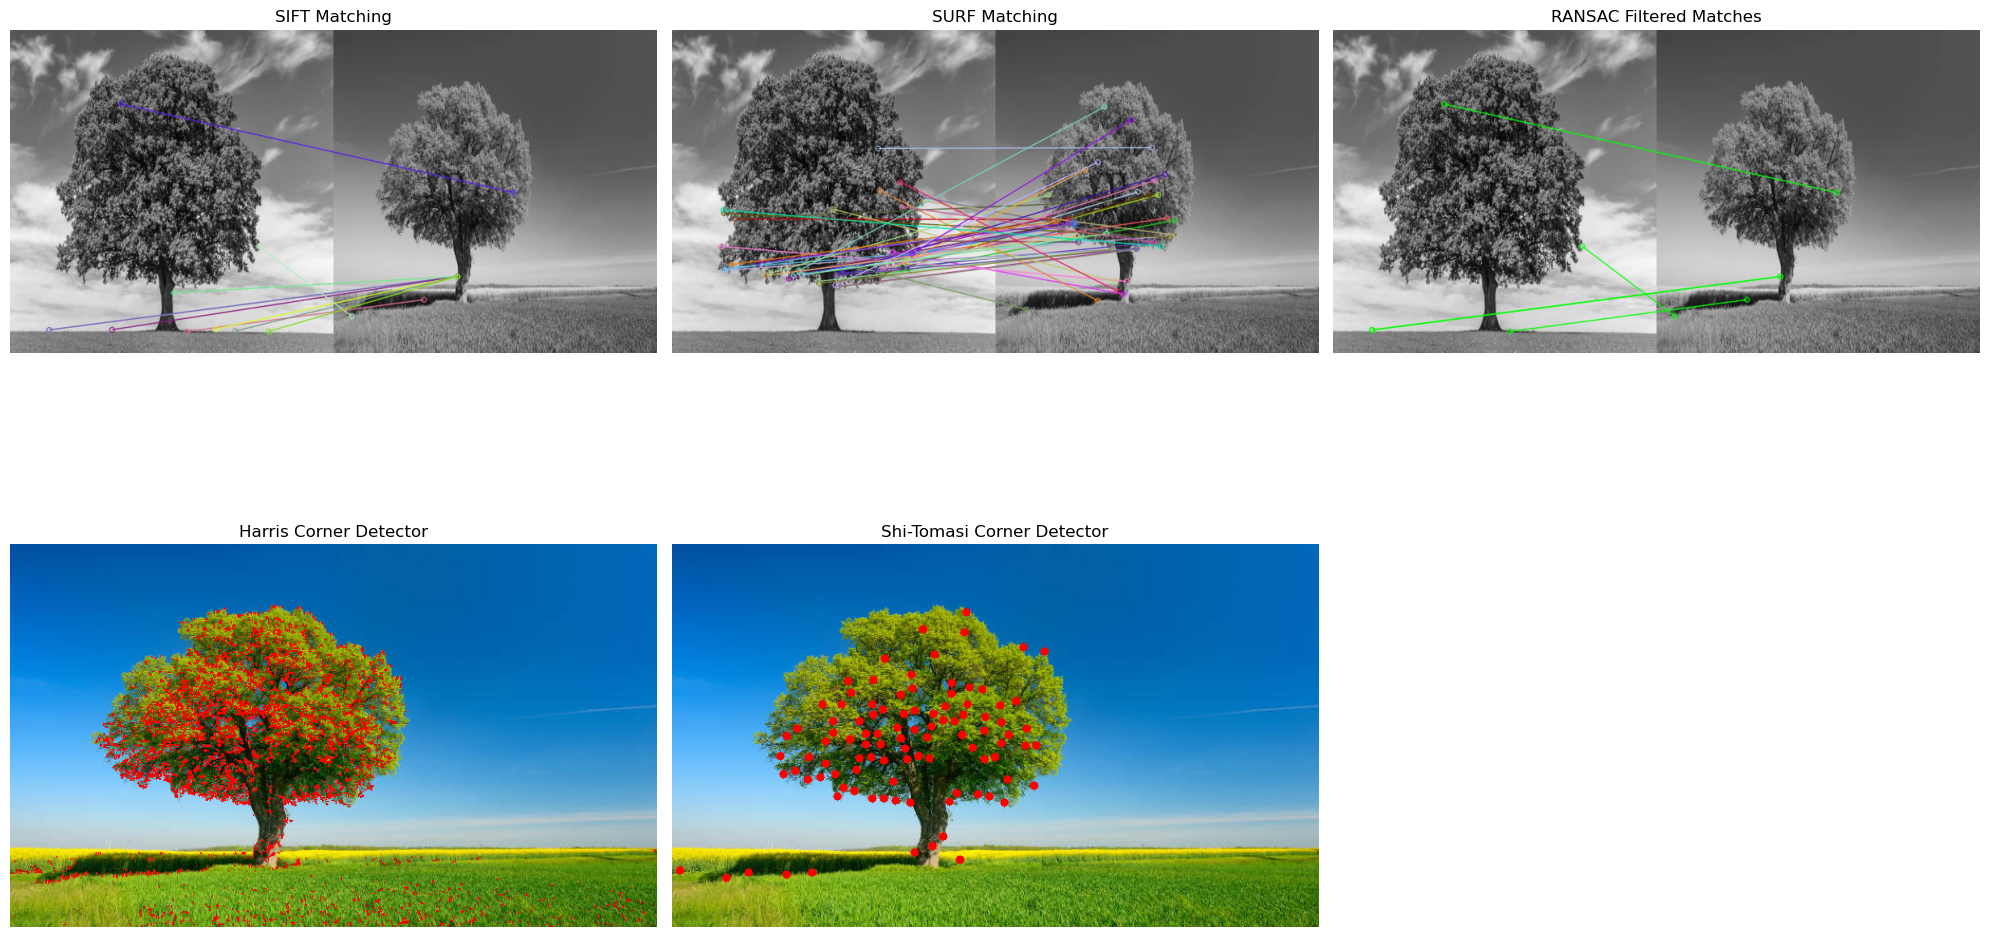

In [62]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow(img_sift)
plt.title('SIFT Matching')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_orb)
plt.title('SURF Matching')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_ransac)
plt.title('RANSAC Filtered Matches')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(harris_img1, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detector')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detector')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(shi_img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detector')
plt.axis('off')

plt.tight_layout()
plt.show()